# Feature Selection

Feature selection is the process of choosing the most relevant features (columns) for your machine learning model. It helps to:

- Improve model performance

- Reduce overfitting

- Speed up training time

- Make models more interpretable

**Feature Selection Methods:**

| Type         | Examples                                    | Description                                    |
| ------------ | ------------------------------------------- | ---------------------------------------------- |
| **Filter**   | Correlation, Chi-square, Mutual Information | Fast, statistical methods independent of model |
| **Wrapper**  | RFE, Forward/Backward Selection             | Use model performance to evaluate subsets      |
| **Embedded** | Lasso, Tree-based Feature Importance        | Selection happens during model training        |


- **Filter:**
    - **Features Correlation** (for numerical features) : Measures the correlation between each feature and the target variable. Features with high correlation are selected.
    - **Chi-Square Test** (for categorical features) : Tests independence between feature and target variable.
    - **Mutual Information** : (for categorical features) : Measures the dependency between features and target.
    - **Cramér’s V** (Categorical-Categorical) : Strength of association
    - **Theil’s U** (Categorical-Categorical) : Predictive power

- **Wrapper:**
    - **Recursive Feature Elimination (RFE)**: Fits the model, ranks features by importance, and eliminates the least important features iteratively.
    - **Forward Selection**: Starts with no features and adds one feature at a time that improves model performance until no further improvement.
    - **Backward Elimination**: Starts with all features and removes the least significant feature iteratively until the performance starts to degrade.

- **Embedded:**
    - **Feature Importance from Decision Trees**: Models like Random Forests and Gradient Boosting Trees provide feature importance scores based on how frequently a feature is used to split the data.

- **Dimensionality Reduction Techniques**
   - **Principal Component Analysis (PCA)**: Transforms features into a set of linearly uncorrelated components ranked by the amount of variance they explain.
   - **Linear Discriminant Analysis (LDA)**: Projects features onto a lower-dimensional space while maximizing class separability.
   - **t-Distributed Stochastic Neighbor Embedding (t-SNE)**: Useful for visualizing high-dimensional data in lower dimensions, though less commonly used for feature selection.


[Blog to Refer](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)

## Imports

In [10]:
# data manulplation
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# statstical testing
from scipy import stats
import statsmodels.api as sm
import statistics as st
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

# train test split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

# metrcs
from sklearn.metrics import f1_score

# general
import os
from typing import List,  Tuple
import warnings
warnings.filterwarnings('ignore')

## Read Data

In [11]:
DATA_LEVEL_1_DIR = os.path.join("data", "heart_stroke_feature_engineered_level_1.csv")
DATA_LEVEL_2_DIR = os.path.join("data", "heart_stroke_feature_engineered_level_2.csv")
DATA_LEVEL_3_DIR = os.path.join("data", "heart_stroke_feature_engineered_level_3.csv")

df = pd.read_csv(DATA_LEVEL_3_DIR)

In [12]:
df.shape

(5110, 19)

In [13]:
df.head()

,Id,Age_Power,Avg_glucose_level_Power,Gender_encode,Ever_married_encode,Work_type_encode,Work_type_children,Work_type_govt_job,Work_type_never_worked,Work_type_private,Work_type_self_employed,Residence_type_encode,Smoking_status_encode,Smoking_status_formerly_smoked,Smoking_status_never_smoked,Smoking_status_smokes,Smoking_status_unknown,Stroke,Bmi_Imputed_median
0,9046,42.663,0.927,1,1,3,0.0,0.0,0.0,1.0,0.0,1,0,1.0,0.0,0.0,0.0,1,36.6
1,51676,39.316,0.926,0,1,4,0.0,0.0,0.0,0.0,1.0,0,1,0.0,1.0,0.0,0.0,1,27.7
2,31112,49.781,0.923,1,1,3,0.0,0.0,0.0,1.0,0.0,0,1,0.0,1.0,0.0,0.0,1,32.5
3,60182,32.478,0.926,0,1,3,0.0,0.0,0.0,1.0,0.0,1,2,0.0,0.0,1.0,0.0,1,34.4
4,1665,49.239,0.926,0,1,4,0.0,0.0,0.0,0.0,1.0,0,1,0.0,1.0,0.0,0.0,1,24.0


In [14]:
df.isna().sum()

Id                                0
Age_Power                         0
Avg_glucose_level_Power           0
Gender_encode                     0
Ever_married_encode               0
Work_type_encode                  0
Work_type_children                0
Work_type_govt_job                0
Work_type_never_worked            0
Work_type_private                 0
Work_type_self_employed           0
Residence_type_encode             0
Smoking_status_encode             0
Smoking_status_formerly_smoked    0
Smoking_status_never_smoked       0
Smoking_status_smokes             0
Smoking_status_unknown            0
Stroke                            0
Bmi_Imputed_median                0
dtype: int64

In [15]:
df.columns

Index(['Id', 'Age_Power', 'Avg_glucose_level_Power', 'Gender_encode',
       'Ever_married_encode', 'Work_type_encode', 'Work_type_children',
       'Work_type_govt_job', 'Work_type_never_worked', 'Work_type_private',
       'Work_type_self_employed', 'Residence_type_encode',
       'Smoking_status_encode', 'Smoking_status_formerly_smoked',
       'Smoking_status_never_smoked', 'Smoking_status_smokes',
       'Smoking_status_unknown', 'Stroke', 'Bmi_Imputed_median'],
      dtype='object')

In [16]:
TARGET_COL = ['Stroke']
NUM_FEATURES = ['Age_Power', 'Avg_glucose_level_Power', 'Bmi_Imputed_median']
CAT_FEATURES = ['Gender_encode', 'Ever_married_encode', 'Work_type_encode',
              'Work_type_children', 'Work_type_govt_job', 'Work_type_never_worked',
              'Work_type_private', 'Work_type_self_employed', 'Residence_type_encode',
              'Smoking_status_encode', 'Smoking_status_formerly_smoked',
              'Smoking_status_never_smoked', 'Smoking_status_smokes',
              'Smoking_status_unknown',]

# Feature Selection Methods

## 1. Filter Methods

In [17]:
from scipy import stats
import statsmodels.api as sm
import statistics as st
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

### 1.1 Correlation

In [18]:
def create_lower_triangular_mask(corr: pd.DataFrame, thresh:float = 40):
    # mask = np.triu(np.ones_like(corr, dtype=bool))
    mask = np.tril(np.ones_like(corr, dtype=bool))
    # shape of mask
    n = mask.shape[0]
    # Traverse the lower triangle
    for i in range(n):
        for j in range(i + 1):  # j goes from 0 to i (inclusive)
            val = np.abs(corr.iloc[i, j])
            if val > thresh and val < 100:
                mask[i][j] = False
    return mask

def check_correlation(df: pd.DataFrame, features: List[str], methods: List[str] = None, percent: bool = True) -> dict():
    # factor
    factor = 1
    if percent:
        factor = 100

    if methods is None:
        methods = ["pearson", "kendall", "spearman"]

    # calculating correlation
    corr = {}
    for method in methods:
        # round offing the correlation to 3 decimal places
        df_corr = np.round(df[features].corr(method=method) * factor, 3) # this counts fractional error
        corr[method] = df_corr

    return corr

def plot_correlation(corr_dict: dict(), width:int=15, height:int=4, thresh:float = 40) -> None:
    # collect no of methods
    no_of_methods = list(corr_dict.keys())
    # collect total columns
    list_of_columns = list(corr_dict[no_of_methods[0]].columns)

    # decide we have to plot horizontally or vertically
    if len(list_of_columns) > 5: 
        # go vertical 
        fig, axes = plt.subplots(len(no_of_methods), 1, figsize=(height, width))

        # plotting all the methods
        for row_idx, method_name in enumerate(no_of_methods):
            # generate mask based on threshold
            mask = create_lower_triangular_mask(corr_dict[method_name], thresh)
            sns.heatmap(corr_dict[method_name], annot=True,
                        square=True, # square in plot
                        cmap='coolwarm', # color system
                        cbar_kws={"shrink": .8},
                        mask=mask, # hididng upper tiangular 
                        annot_kws={"size": 10, "color": "black"},  # Customize font size and color
                        ax=axes[row_idx])

            axes[row_idx].set_title(f"{method_name} Correlation (%) | Min threshold: {thresh}")

        plt.tight_layout()
        plt.show()        

    else: 
        # go horizontal
        fig, axes = plt.subplots(1, len(no_of_methods), figsize=(width, height))

        # plotting all the methods
        for col_idx, method_name in enumerate(no_of_methods):
            # generate mask based on threshold
            mask = create_lower_triangular_mask(corr_dict[method_name], thresh)
            sns.heatmap(corr_dict[method_name], annot=True, 
                        square=True, # square in plot
                        cmap='coolwarm', # color system
                        cbar_kws={"shrink": .8},
                        mask=mask, # hididng upper tiangular 
                        annot_kws={"size": 10, "color": "black"},  # Customize font size and color
                        ax=axes[col_idx])
            axes[col_idx].set_title(f"{method_name} Correlation (%)| Min threshold: {thresh}")

        plt.tight_layout()
        plt.show()    

In [19]:
# check for correlation w.r.t target
h = check_correlation(df, NUM_FEATURES+TARGET_COL)

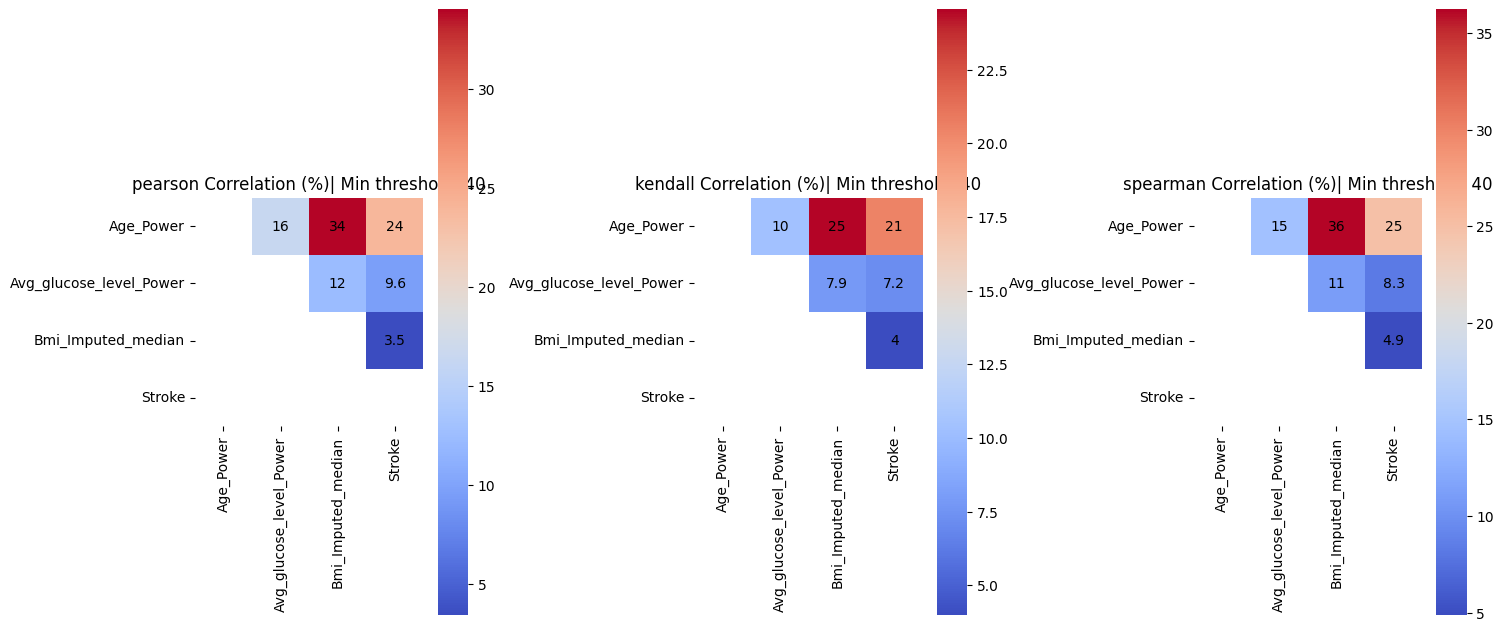

In [20]:
v = check_correlation(df, NUM_FEATURES+TARGET_COL)
# vertical plot
plot_correlation(v, 15, 8)

- no such correlation found

### 1.2 Statistical Tests

#### Normality Check

In [21]:
# normality check
def check_normality(data):
    """ 
    hypothesis test for normality check in continuous variable
    """
    stat, p_value = stats.shapiro(data)
    h_0 = "H0: data normally distributed"
    h_1 = "H1: data not normally distributed"
    result = ""
    if p_value < 0.05:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"

    return {"h0":h_0, "h1":h_1,"p_val":p_value, "cc":result}

#### T-test: two smaple

In [22]:
# z-test - 2 category
def t_test_of_independence(df, x_col, y_col):
    """
    A t-test is a statistical test used to determine if there is a significant difference between 
    the means of two groups. It is commonly used when comparing the means of a numerical variable
    (dependent variable) across two categorical groups (independent variable).
    """
    h_0=f"H0: no differnce in mean's"
    h_1=f"H1: difference in mean's"
    categories = df[y_col].unique()
    # Separate numeric values by category
    group_A = df[df[y_col] == categories[0]][x_col]
    group_B = df[df[y_col] == categories[1]][x_col]

    # Perform independent t-test assuming equal variances
    t_stat, p_value = stats.ttest_ind(group_A, group_B)
    result = ""
    if np.round(p_value, 2) < 0.05:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"
    return {"h0":h_0, "h1":h_1,"p_val":p_value, "cc":result}

#### Mann whitney U test

In [23]:
from scipy.stats import mannwhitneyu

# mann whitney u test
def mannwhitneyu_test(df, x_col, y_col):
    """
    A t-test is a statistical test used to determine if there is a significant difference between 
    the means of two groups. It is commonly used when comparing the means of a numerical variable
    (dependent variable) across two categorical groups (independent variable).
    """
    h_0=f"H0: no differnce in mean's"
    h_1=f"H1: difference in mean's"
    categories = df[y_col].unique()
    # Separate numeric values by category
    group_A = df[df[y_col] == categories[0]][x_col]
    group_B = df[df[y_col] == categories[1]][x_col]

    # Perform independent t-test assuming equal variances
    u_stat, p_value = stats.mannwhitneyu(group_A, group_B, alternative='two-sided')

    result = ""
    if np.round(p_value, 2) < 0.05:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"
    return {"h0":h_0, "h1":h_1,"p_val":p_value, "cc":result}

#### Chi-square test

In [24]:
# chi square goodness of fit test
def chisquare_test(df, col):
    """
    we compare the observed frequencies of categories within that variable 
    to the expected frequencies under a specified distribution or hypothesis
    """
    h_0="H0: observed == expected"
    h_1="H1: observed != expected"
    observed = np.array(df[col].value_counts())
    total_observed = np.sum(observed)
    expected = np.array([total_observed/df[col].nunique()] * df[col].nunique())
    # Perform chi-square goodness-of-fit test
    chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
    result = ""
    if np.round(p_value, 2) < 0.05:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"
    return {"h0":h_0, "h1":h_1,"p_val":p_value, "cc":result}

#### Chi-square test of independence

In [25]:
# chi squre test of independence
def chisquare_independence_test(df, x_col, y_col):
    """
    To determine if there is a significant association or relationship between two categorical variables.
    """
    h_0=f"H0: no relation btween {x_col} & {y_col}" # both are independent
    h_1=f"H1: relation btween {x_col} & {y_col}" # there is a dependency
    contingency_table = pd.crosstab(df[x_col], df[y_col])
    # Perform Chi-square test of independence
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    result = ""
    if np.round(p_value, 2) < 0.05:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"
    return {"h0":h_0, "h1":h_1,"p_val":p_value, "cc":result}

#### Anova test

In [26]:
def ANOVA(df, x_col, y_col):
    """
    A f-test is a statistical test used to determine if there is a significant difference between 
    the means of more than two groups. It is commonly used when comparing the means of a numerical variable
    (dependent variable) across more than two categorical groups (independent variable).
    """
    h_0=f"H0: no differnce in mean's"
    h_1=f"H1: difference in mean's"

    # Fit the model
    model = ols(f'{y_col} ~ C({x_col})', data=df).fit()
    
    # Perform ANOVA
    anova_table = anova_lm(model, typ=2)
    
    # Extract p-value for the categorical variable
    p_value = anova_table['PR(>F)'][0]

    result = ""
    if np.round(p_value, 2) < 0.05:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"
    return {"h0":h_0, "h1":h_1,"p_val":p_value, "cc":result}

In [27]:
# possible statstical method to filter all combination of feature and target
def statistical_filtering(df:pd.DataFrame, num_features:List[str], cat_features:List[str], target:str):
    """
    this function will filter numerical and categorical variables
    based on statstical test score if there is a significance 
    """
    # blank report 
    report_df = pd.DataFrame()

    # numrical features: int -> cat | float -> cat
    feature_names = []
    feature_type = []
    distribution_status = []
    test_performed = []
    pval = []
    is_selected = []
    for num_feature in num_features:
        DIST_STATUS = "Not Normal"
        TEST_PERFORMED = "None"
        # check normality
        norm_result = check_normality(df[num_feature].values)
        if norm_result["p_val"] < 0.05:
            DIST_STATUS = "Normal"
            # parametric
            test_results = t_test_of_independence(df, num_feature, target)
            TEST_PERFORMED = "t-test:2 sample"
        else:
            # non parametricsss
            test_results = mannwhitneyu_test(df, num_feature, target)
            TEST_PERFORMED = "mannwhitney"
        # collecting results
        feature_names.append(num_feature)
        feature_type.append("numerical")
        distribution_status.append(DIST_STATUS)
        test_performed.append(TEST_PERFORMED)
        pval.append(test_results["p_val"])
        if test_results["p_val"] < 0.05:
            is_selected.append("Yes")
        else:
            is_selected.append("No")

    # categorical features: binary -> cat | ordinal -> cat | nominal -> cat
    for cat_feature in cat_features:
        unique = df[cat_feature].nunique()
        DIST_STATUS = "Not Uniform"
        # TEST_PERFORMED = "None"

        # check uniformity
        uniform_result = chisquare_test(df, cat_feature)
        if uniform_result["p_val"] < 0.05:
            DIST_STATUS = "Uniform"
        TEST_PERFORMED = "None"
        if unique > 2:
            test_results = ANOVA(df, cat_feature, target)
            TEST_PERFORMED = "Anova test"
        else:
            test_results = chisquare_independence_test(df, cat_feature, target)
            TEST_PERFORMED = "Chi2 Test"
        # collecting results
        feature_names.append(cat_feature)
        feature_type.append("categorical")
        distribution_status.append(DIST_STATUS)
        test_performed.append(TEST_PERFORMED)
        pval.append(test_results["p_val"])
        if test_results["p_val"] < 0.05:
            is_selected.append("Yes")
        else:
            is_selected.append("No")
    # add to report
    report_df["Feature"] = feature_names
    report_df["Type"] = feature_type
    report_df["Distrbution"] = distribution_status
    report_df["Test Performed"] = test_performed
    report_df["P Value"] = pval
    report_df["Is Selected?"] = is_selected

    return report_df

In [28]:
statistically_selected = statistical_filtering(df, NUM_FEATURES, CAT_FEATURES, TARGET_COL[0])
statistically_selected

,Feature,Type,Distrbution,Test Performed,P Value,Is Selected?
0,Age_Power,numerical,Normal,t-test:2 sample,4.251285e-67,Yes
1,Avg_glucose_level_Power,numerical,Normal,t-test:2 sample,4.841366e-12,Yes
2,Bmi_Imputed_median,numerical,Normal,t-test:2 sample,1.318122e-02,Yes
3,Gender_encode,categorical,Uniform,Anova test,7.896500e-01,No
4,Ever_married_encode,categorical,Uniform,Chi2 Test,1.638902e-14,Yes
5,Work_type_encode,categorical,Uniform,Anova test,4.904670e-10,Yes
6,Work_type_children,categorical,Uniform,Chi2 Test,3.632889e-09,Yes
7,Work_type_govt_job,categorical,Uniform,Chi2 Test,9.248831e-01,No
8,Work_type_never_worked,categorical,Uniform,Chi2 Test,5.702627e-01,No
9,Work_type_private,categorical,Uniform,Chi2 Test,4.329496e-01,No


In [29]:
statistically_selected[statistically_selected["Is Selected?"] == 'Yes']['Feature'].to_list()

['Age_Power',
 'Avg_glucose_level_Power',
 'Bmi_Imputed_median',
 'Ever_married_encode',
 'Work_type_encode',
 'Work_type_children',
 'Work_type_self_employed',
 'Smoking_status_encode',
 'Smoking_status_formerly_smoked',
 'Smoking_status_unknown']

### 1.3 Mutual Information

## 2. Wrapper Methods

In [48]:
from sklearn.preprocessing import StandardScaler # scaling
from sklearn.compose import ColumnTransformer # columns
from sklearn.pipeline import Pipeline  # pipeline

In [30]:
ALL_FEATURES = NUM_FEATURES+CAT_FEATURES
STATISTICALLY_FILTTERED = ['Age_Power', 'Avg_glucose_level_Power', 'Bmi_Imputed_median',
                            'Ever_married_encode', 'Work_type_encode', 'Work_type_children',
                            'Work_type_self_employed', 'Smoking_status_encode', 'Smoking_status_formerly_smoked', 
                            'Smoking_status_unknown'] + TARGET_COL

In [31]:
df[NUM_FEATURES+CAT_FEATURES].columns

Index(['Age_Power', 'Avg_glucose_level_Power', 'Bmi_Imputed_median',
       'Gender_encode', 'Ever_married_encode', 'Work_type_encode',
       'Work_type_children', 'Work_type_govt_job', 'Work_type_never_worked',
       'Work_type_private', 'Work_type_self_employed', 'Residence_type_encode',
       'Smoking_status_encode', 'Smoking_status_formerly_smoked',
       'Smoking_status_never_smoked', 'Smoking_status_smokes',
       'Smoking_status_unknown'],
      dtype='object')

In [32]:
# features = df[NUM_FEATURES+CAT_FEATURES].columns
X = np.array(df[STATISTICALLY_FILTTERED].values, dtype=np.float64)
y = df[TARGET_COL].iloc[:, 0].values

In [33]:
# linear model
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
# Byes model
from sklearn.naive_bayes import GaussianNB
# support vector machine
from sklearn.svm import SVC
# distance based model
from sklearn.neighbors import KNeighborsClassifier
# tree based
from sklearn.tree import DecisionTreeClassifier
# bagging special case
from sklearn.ensemble import RandomForestClassifier
# ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.base import BaseEstimator
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

from typing import Optional, List, Tuple

In [34]:
# write a code to execute individial model at a tmie.

In [96]:
class Wrapper_Methods:

    def __init__(self, df:pd.DataFrame, features:List[str], target:List[str], scoring:str, cv:int, seed:int, shuffle:bool):
        self.df = df
        self.features = features
        self.target = target
        self.scoring = scoring
        self.cv = cv
        self.seed = seed
        self.shuffle = shuffle
        self.X, self.y = self.load_data()
        self.model_tags = ["LR", "RDG", "NB", "SVM", "KNN", "DT", "RF", "SGD", "GB", "AB", "ETC", "XGB", "XGRFB", "LGB", "CB"]
        self.model_report = dict()

    def load_data(self):
        try:
            X = self.df[self.features].values
            y = self.df[self.target].iloc[:,0].values
            return X, y
        except Exception as e:
            raise e

    def get_model(self, model_tag):
        try:
            if model_tag == "LR":
                return {"LR": ("Logistic Regression", LogisticRegression(solver="liblinear" ,max_iter=1000))}
            
            if model_tag == "RDG":
                return {"RDG": {"Ridge Classifier", RidgeClassifier()}}
            
            if model_tag == "SGD":
                return {"SGD": ("Stocastic Gradient", SGDClassifier())}
            
            if model_tag == "NB":        
                return {"NB": ("Naive Bayes", GaussianNB())}

            if model_tag == "SVM":        
                return {"SVM": ("Support Vector", SVC(kernel='linear'))} # this kernel works with RFE

            if model_tag == "KNN":         
                return {"KNN": ("K-Neighbors", KNeighborsClassifier(n_neighbors=2))}

            if model_tag == "DT":        
                return {"DT": ("Decision Tree", DecisionTreeClassifier())}

            if model_tag == "RF":        
                return {"RF": ("Random Forest", RandomForestClassifier())}

            if model_tag == "GB":        
                return {"GB": ("Gradient Boosting", GradientBoostingClassifier())}

            if model_tag == "AB":        
                return {"AB": ("Ada Boosting", AdaBoostClassifier())}

            if model_tag == "ETC":        
                return {"ETC": ("Extra Tres Boosting", ExtraTreesClassifier())}

            if model_tag == "XGB":        
                return {"XGB": ("XG Boost", XGBClassifier())}

            if model_tag == "XGRFB":        
                return {"XGRFB": ("XG Boost(RF)", XGBRFClassifier())}

            if model_tag == "LGB":        
                return {"LGB": ("Light Boosting",LGBMClassifier(learning_rate=0.01, n_estimators=1000))}

            if model_tag == "CB":        
                return {"CB": ("Cat Boosting", CatBoostClassifier(verbose=0))}
        except Exception as e:
            raise e


    def evaluate_model(self, model, n_features:List[int]):
        try:
            # define the model evaluation procedure
            cv = StratifiedKFold(n_splits=self.cv, random_state=self.seed, shuffle=self.shuffle)
            # evaluate the model: n-jobs=-1 [uses all cores]
            scores = cross_val_score(model, self.X[:,n_features], self.y, scoring=self.scoring, cv=cv, n_jobs=-1)
            # return scores
            return scores
        except Exception as e:
            raise e

    def get_custome_scores(self, scores: List[float]):
        try:
            mean_score = np.mean(scores)
            std_score = np.std(scores)
            # return mean and std for cross validations scores
            return mean_score, std_score
        except Exception as e:
            raise e
    
    def box_plot(self, names: Optional[List[str]] = None, results: Optional[List[List[float]]]= None) -> None:
        """
        Plots a box plot to compare model performance across different feature combinations.

        Args:
            names (List[str]): List of model or feature combination names (used as x-axis labels).
            results (List[List[float]]): A list of score lists, where each sublist contains
                                        cross-validation scores for a model or feature set.

        Returns:
            None

        Raises:
            ValueError: If the input lengths of `names` and `results` do not match.
            Exception: For any unexpected errors during plotting.
        """
        try:
            if names is None and results is None:
                names = self.model_report.keys()
                results = self.model_report.values()

            if len(names) != len(results):
                raise ValueError("Length of 'names' must match the number of result sets.")

            plt.boxplot(results, labels=names, showmeans=True, vert=False)
            plt.ylabel("Models")
            plt.xlabel(f"Score: {self.scoring}")
            plt.title("Performance of Models")
            plt.grid()
            plt.show()

        except Exception as e:
            print(f"An error occurred while plotting the box plot: {e}")
            raise

    @staticmethod
    def get_scores(df: pd.DataFrame, columns: List[str] = ["model_name", "cv_scores"]):
        try:
            # get columns
            df = df[columns].copy()
            # get mean
            df["mean"] = df["cv_scores"].map(lambda x: np.mean(x))
            # get std
            df["std"] = df["cv_scores"].map(lambda x: np.std(x))
            # return sorted report
            return df.sort_values(by='mean', ascending=False).reset_index(drop=True)
        except Exception as e:
            raise e

    def directional_feature_selection(
        self, 
        model_tags: Optional[List[str]] = None,
        print_status:bool = False, 
        direction: str = "forward",
        custom_model: Optional[List[Tuple[str, BaseEstimator]]] = None
    ) -> dict:
        """ 
        Objective: this works on subset of features and there influence over evaluation metric, that will get us to max score
        by forwardly or backwardly eliminating the features from superset

        Remainder: this technique works with parametric and non-parametric models, does not rely on feature importance or 
        models coefficients to determin the feature selection

        Parameters:

        model_tags (List[str]): abbrivateions of model its optional 

        print_status (bool): print model training status

        direction (str): feature selection direction , default is "forward"
                            "forward"  : subset -> superset
                            "backward" : superset -> subset

        Returns:

        model_report (dict): models performance on each subset of features
        """
        try:
            # run model evaluation for all sub set of features
            model_report = dict()
            features_list = []
            model_names = []
            all_scores = []

            # Decide which models to run
            models_to_run = []

            if custom_model is not None:
                models_to_run.extend(custom_model)
            elif model_tags:
                for model_tag in model_tags:
                    model_name, model = self.get_model(model_tag)[model_tag]
                    models_to_run.append((model_name, model))
            else:
                raise ValueError("You must provide either `model_tags` or a `custom_model`.")

            # cross validation object
            cv = StratifiedKFold(n_splits=self.cv, random_state=self.seed, shuffle=self.shuffle)

            # feature selection run on models  
            for model_name, model in models_to_run:

                # features selection object
                selection_obj = SequentialFeatureSelector(
                    estimator=model,         # try on this model
                    n_features_to_select="auto", # select automatically,
                    tol = None,                  # score threshould
                    direction=direction,         # direction of feature selection
                    scoring=self.scoring,        # evaluation metric
                    cv=cv,                       # cross validation method
                    n_jobs=-1,                   # use all cores
                )
                # fitting object to select features
                selection_obj.fit(X, y)

                # selected features
                selected_features = selection_obj.get_feature_names_out(self.features)

                # collecting finally selected features
                features_list.append(selected_features)

                # collecting models name
                model_names.append(model_name)    

                # evaluating for score on selected features
                eval_scores = self.evaluate_model(model, selection_obj.get_support(indices=True))

                # keeping the track of model run and scores
                self.model_report[model_name] = eval_scores

                # collecting scores of each fold
                all_scores.append(eval_scores)

                # print scores
                if print_status:
                    # print model name
                    print('='*15,model_name,'='*15)

                    # mean scores
                    mean, std = self.get_custome_scores(eval_scores)

                    msg = f"{len(selected_features)} : Mean: {mean} Std: {std}\n"
                    print(msg)

            # collecting all scores
            model_report["model_name"] = model_names
            model_report["selected_features"] = features_list
            model_report["cv_scores"] = all_scores

            return model_report
        except Exception as e:
            raise e

    def backward_feature_elimination(
        self,
        model_tags: Optional[List[str]] = None,
        print_status:bool = False,
        custom_model: Optional[List[Tuple[str, BaseEstimator]]] = None
    ) -> dict:
        """ 
        Objective: this works on subset of features and there influence over evaluation metric, that will get us to max score
        by forwardly or backwardly eliminating the features from superset

        Remainder: this technique works with parametric and non-parametric models, does not rely on feature importance or 
        models coefficients to determin the feature selection

        Parameters:

        model_tags (List[str]): abbrivateions of model its optional 

        print_status (bool): print model training status

        direction (str): feature selection direction , default is "forward"
                            "forward"  : subset -> superset
                            "backward" : superset -> subset

        Returns:

        model_report (dict): models performance on each subset of features
        """
        try:
            # run model evaluation for all sub set of features
            model_report = dict()
            features_list = []
            model_names = []
            all_scores = []

            # Decide which models to run
            models_to_run = []

            if custom_model is not None:
                models_to_run.extend(custom_model)
            elif model_tags:
                for model_tag in model_tags:
                    model_name, model = self.get_model(model_tag)[model_tag]
                    models_to_run.append((model_name, model))
            else:
                raise ValueError("You must provide either `model_tags` or a `custom_model`.")

            # cross validation object
            cv = StratifiedKFold(n_splits=self.cv, random_state=self.seed, shuffle=self.shuffle)

            # feature selection run on models  
            for model_name, model in models_to_run:

                # features selection object
                selection_obj = RFECV(
                estimator=model,        # try on this model
                step=1,                     # num of features at a time
                cv=cv,                      # evaluation metric
                scoring=self.scoring,       # evaluation metric
                min_features_to_select=1,   # minimun feature select
                n_jobs=-1,                  # use all cores
                )
                
                # fitting object to select features
                selection_obj.fit(X, y)

                # selected features
                selected_features = selection_obj.get_feature_names_out(self.features)

                # collecting finally selected features
                features_list.append(selected_features)

                # collecting models name
                model_names.append(model_name)    

                # evaluating for score on selected features
                eval_scores = self.evaluate_model(model, selection_obj.get_support(indices=True))

                # keeping the track of model run and scores
                self.model_report[model_name] = eval_scores

                # collecting scores of each fold
                all_scores.append(eval_scores)

                # print scores
                if print_status:
                    # print model name
                    print('='*15,model_name,'='*15)

                    # mean scores
                    mean, std = self.get_custome_scores(eval_scores)

                    msg = f"{len(selected_features)} : Mean: {mean} Std: {std}\n"
                    print(msg)

            # collecting all scores
            model_report["model_name"] = model_names
            model_report["selected_features"] = features_list
            model_report["cv_scores"] = all_scores

            return model_report
        except Exception as e:
            raise e

In [44]:
df.columns

Index(['Id', 'Age_Power', 'Avg_glucose_level_Power', 'Gender_encode',
       'Ever_married_encode', 'Work_type_encode', 'Work_type_children',
       'Work_type_govt_job', 'Work_type_never_worked', 'Work_type_private',
       'Work_type_self_employed', 'Residence_type_encode',
       'Smoking_status_encode', 'Smoking_status_formerly_smoked',
       'Smoking_status_never_smoked', 'Smoking_status_smokes',
       'Smoking_status_unknown', 'Stroke', 'Bmi_Imputed_median'],
      dtype='object')

In [46]:
NUM_FEATURES = ['Age_Power', 'Avg_glucose_level_Power', 'Bmi_Imputed_median']
CAT_FEATURES = ['Gender_encode',
       'Ever_married_encode', 'Work_type_encode', 'Work_type_children',
       'Work_type_govt_job', 'Work_type_never_worked', 'Work_type_private',
       'Work_type_self_employed', 'Residence_type_encode',
       'Smoking_status_encode', 'Smoking_status_formerly_smoked',
       'Smoking_status_never_smoked', 'Smoking_status_smokes',
       'Smoking_status_unknown',]
DROP_FEATURES = ['Id',]

In [49]:
numeric_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=False))
]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('drop_this', 'drop', DROP_FEATURES),
        ("numeric_Pipeline",numeric_pipeline, NUM_FEATURES),
        ("Categorical_Pipeline",categorical_pipeline, CAT_FEATURES),
    ],
    remainder='passthrough'  # Optionally keep unlisted columns
)

In [66]:
X = df.drop(TARGET_COL, axis=1)
y = df[TARGET_COL]
X = preprocessor.fit_transform(X) 

In [67]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

In [68]:
DF = pd.concat([pd.DataFrame(np.round(X_res,2), columns=NUM_FEATURES+CAT_FEATURES), y_res], axis=1)

In [70]:
DF.shape

(8192, 18)

In [71]:
# parameters
DATA = DF.copy()
# TARGET_COL = TARGET_COL[0]
FEATURES = [i for i in DF.columns if i not in TARGET_COL]
SCORING = "f1"
CV = 5
SEED = 0
SHUFFLE = True

In [77]:
# FEATURES

In [73]:
# models work with forward selection approach
model_tags = ["LR", "NB", "SVM", "KNN", "DT", "RF", "GB", "AB", "ETC", "XGB", "XGRFB","CB"]

## Forward Feature Selection

In [74]:
wrapper_ffs_obj = Wrapper_Methods(
    DATA,
    FEATURES,
    TARGET_COL,
    SCORING,
    CV,
    SEED,
    SHUFFLE
)

### 1. Logistic Regression

In [75]:
LR_model_report = wrapper_ffs_obj.directional_feature_selection(["LR"], True)
LR_model_report

/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

=============== Logistic Regression ===============
8 : Mean: 0.8706077285020726 Std: 0.004687581630006224



/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

{'model_name': ['Logistic Regression'],
 'selected_features': [array(['Age_Power', 'Avg_glucose_level_Power', 'Bmi_Imputed_median',
         'Gender_encode', 'Ever_married_encode', 'Work_type_encode',
         'Work_type_children', 'Work_type_govt_job'], dtype=object)],
 'cv_scores': [array([0.87867036, 0.86618545, 0.86966292, 0.86603669, 0.87248322])]}

### 2. Naive Bayes

In [78]:
NB_model_report = wrapper_ffs_obj.directional_feature_selection(["NB"], True)
NB_model_report

/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

=============== Naive Bayes ===============
8 : Mean: 0.7821413054510146 Std: 0.004262862747700376



/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

{'model_name': ['Naive Bayes'],
 'selected_features': [array(['Age_Power', 'Avg_glucose_level_Power', 'Bmi_Imputed_median',
         'Ever_married_encode', 'Work_type_never_worked',
         'Work_type_self_employed', 'Smoking_status_formerly_smoked',
         'Smoking_status_unknown'], dtype=object)],
 'cv_scores': [array([0.77732794, 0.78474114, 0.78099548, 0.78901602, 0.77862595])]}

### 3. Support Vector Machine

In [92]:
# SVM_model_report = wrapper_ffs_obj.directional_feature_selection(["SVM"], True)
# SVM_model_report

### 4. K-Nearest Neighbours

In [79]:
KNN_model_report = wrapper_ffs_obj.directional_feature_selection(["KNN"], True)
KNN_model_report

/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

=============== K-Neighbors ===============
8 : Mean: 0.8079206231011243 Std: 0.004269592856546607



{'model_name': ['K-Neighbors'],
 'selected_features': [array(['Age_Power', 'Ever_married_encode', 'Work_type_children',
         'Smoking_status_encode', 'Smoking_status_formerly_smoked',
         'Smoking_status_never_smoked', 'Smoking_status_smokes',
         'Smoking_status_unknown'], dtype=object)],
 'cv_scores': [array([0.80165289, 0.80629706, 0.81441196, 0.81036835, 0.80687285])]}

### 5. Decision Tree

In [80]:
DT_model_report = wrapper_ffs_obj.directional_feature_selection(["DT"], True)
DT_model_report

=============== Decision Tree ===============
8 : Mean: 0.9069810128143152 Std: 0.012788983954320517



{'model_name': ['Decision Tree'],
 'selected_features': [array(['Age_Power', 'Bmi_Imputed_median', 'Gender_encode',
         'Work_type_children', 'Work_type_never_worked',
         'Residence_type_encode', 'Smoking_status_encode',
         'Smoking_status_never_smoked'], dtype=object)],
 'cv_scores': [array([0.91910499, 0.90971429, 0.92184826, 0.89262914, 0.89160839])]}

### 6. Random Forest

In [91]:
RF_model_report = wrapper_ffs_obj.directional_feature_selection(["RF"], True)
RF_model_report

/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return f

=============== Random Forest ===============
8 : Mean: 0.9014684648200701 Std: 0.010513197302064688



{'model_name': ['Random Forest'],
 'selected_features': [array(['Age_Power', 'Bmi_Imputed_median', 'Work_type_encode',
         'Work_type_children', 'Work_type_govt_job',
         'Work_type_never_worked', 'Work_type_private',
         'Work_type_self_employed'], dtype=object)],
 'cv_scores': [array([0.91509972, 0.9068323 , 0.9011236 , 0.8830874 , 0.90119931])]}

### 7. Gradient Boost

In [81]:
GB_model_report = wrapper_ffs_obj.directional_feature_selection(["GB"], True)
GB_model_report

/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_

=============== Gradient Boosting ===============
8 : Mean: 0.8969945732433544 Std: 0.007099412146283576



{'model_name': ['Gradient Boosting'],
 'selected_features': [array(['Age_Power', 'Bmi_Imputed_median', 'Ever_married_encode',
         'Work_type_encode', 'Work_type_children', 'Work_type_govt_job',
         'Work_type_never_worked', 'Work_type_self_employed'], dtype=object)],
 'cv_scores': [array([0.90638767, 0.90245232, 0.89540675, 0.88569851, 0.89502762])]}

### 8. Ada Boost

In [82]:
AB_model_report = wrapper_ffs_obj.directional_feature_selection(["AB"], True)
AB_model_report

/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

=============== Ada Boosting ===============
8 : Mean: 0.8950773160758938 Std: 0.009660227943854696



{'model_name': ['Ada Boosting'],
 'selected_features': [array(['Age_Power', 'Avg_glucose_level_Power', 'Bmi_Imputed_median',
         'Gender_encode', 'Ever_married_encode', 'Work_type_encode',
         'Work_type_children', 'Smoking_status_smokes'], dtype=object)],
 'cv_scores': [array([0.91040623, 0.88814318, 0.89385475, 0.8826502 , 0.90033223])]}

### 9. Extra Tree Classifier

In [83]:
ETC_model_report = wrapper_ffs_obj.directional_feature_selection(["ETC"], True)
ETC_model_report

/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return f

=============== Extra Tres Boosting ===============
8 : Mean: 0.8995979881595592 Std: 0.007541104928992835



{'model_name': ['Extra Tres Boosting'],
 'selected_features': [array(['Age_Power', 'Bmi_Imputed_median', 'Work_type_encode',
         'Work_type_children', 'Work_type_govt_job',
         'Work_type_never_worked', 'Work_type_private',
         'Work_type_self_employed'], dtype=object)],
 'cv_scores': [array([0.90909091, 0.90414067, 0.90253521, 0.88787706, 0.89434609])]}

### 10. Xtream Gradient Boost

In [86]:
XGB_model_report = wrapper_ffs_obj.directional_feature_selection(["XGB"], True)
XGB_model_report

=============== Extra Gradient Boosting ===============
8 : Mean: 0.9233058539790091 Std: 0.007556571803958194



{'model_name': ['Extra Gradient Boosting'],
 'selected_features': [array(['Age_Power', 'Bmi_Imputed_median', 'Work_type_govt_job',
         'Work_type_never_worked', 'Smoking_status_encode',
         'Smoking_status_formerly_smoked', 'Smoking_status_smokes',
         'Smoking_status_unknown'], dtype=object)],
 'cv_scores': [array([0.9282891 , 0.92542373, 0.92833147, 0.90837104, 0.92611393])]}

### 11. Xtream Gradient Boost Random Forest

In [87]:
XGRFB_model_report = wrapper_ffs_obj.directional_feature_selection(["XGRFB"], True)
XGRFB_model_report

=============== Extra Random Forest Boosting ===============
8 : Mean: 0.8997767567424461 Std: 0.0092691618974278



{'model_name': ['Extra Random Forest Boosting'],
 'selected_features': [array(['Age_Power', 'Bmi_Imputed_median', 'Gender_encode',
         'Work_type_children', 'Work_type_never_worked',
         'Residence_type_encode', 'Smoking_status_formerly_smoked',
         'Smoking_status_never_smoked'], dtype=object)],
 'cv_scores': [array([0.90559824, 0.90929204, 0.89712389, 0.88300221, 0.9038674 ])]}

### 12. Cat Boost

- 10 min

In [88]:
CB_model_report = wrapper_ffs_obj.directional_feature_selection(["CB"], True)
CB_model_report

=============== Cat Boosting ===============
8 : Mean: 0.929282609666217 Std: 0.008124925656073359



{'model_name': ['Cat Boosting'],
 'selected_features': [array(['Age_Power', 'Ever_married_encode', 'Work_type_encode',
         'Work_type_children', 'Work_type_govt_job',
         'Work_type_self_employed', 'Residence_type_encode',
         'Smoking_status_never_smoked'], dtype=object)],
 'cv_scores': [array([0.93566591, 0.93169093, 0.92596811, 0.91519636, 0.93789174])]}

### Final Report

In [92]:
ffs_models_report = wrapper_ffs_obj.get_scores(
    pd.concat(
    [   
        pd.DataFrame(LR_model_report),
        pd.DataFrame(NB_model_report),
        # pd.DataFrame(SVM_model_report),
        pd.DataFrame(KNN_model_report),
        pd.DataFrame(DT_model_report),
        pd.DataFrame(RF_model_report),
        pd.DataFrame(GB_model_report),
        pd.DataFrame(AB_model_report),
        pd.DataFrame(ETC_model_report),
        pd.DataFrame(XGB_model_report),
        pd.DataFrame(XGRFB_model_report),
        pd.DataFrame(CB_model_report)
    ],
    axis=0
).reset_index(
    drop=True
)
)


In [93]:
wrapper_ffs_obj.get_scores(ffs_models_report)

,model_name,cv_scores,mean,std
0,Cat Boosting,"[0.935665914221219, 0.9316909294512877, 0.9259...",0.929283,0.008125
1,Extra Gradient Boosting,"[0.9282891022021457, 0.9254237288135594, 0.928...",0.923306,0.007557
2,Decision Tree,"[0.9191049913941481, 0.9097142857142857, 0.921...",0.906981,0.012789
3,Random Forest,"[0.9150997150997151, 0.906832298136646, 0.9011...",0.901468,0.010513
4,Extra Random Forest Boosting,"[0.9055982436882546, 0.90929203539823, 0.89712...",0.899777,0.009269
5,Extra Tres Boosting,"[0.9090909090909092, 0.9041406693136699, 0.902...",0.899598,0.007541
6,Gradient Boosting,"[0.9063876651982379, 0.9024523160762943, 0.895...",0.896995,0.007099
7,Ada Boosting,"[0.9104062326099053, 0.8881431767337808, 0.893...",0.895077,0.009660
8,Logistic Regression,"[0.8786703601108034, 0.8661854525263741, 0.869...",0.870608,0.004688
9,K-Neighbors,"[0.8016528925619835, 0.8062970568104039, 0.814...",0.807921,0.004270


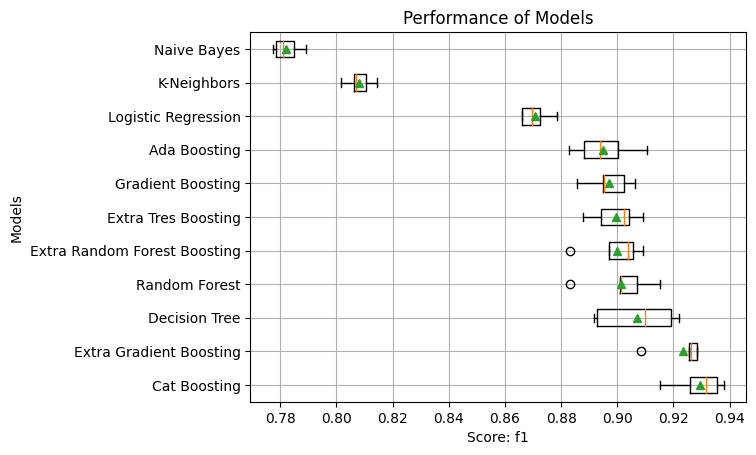

In [94]:
wrapper_ffs_obj.box_plot(ffs_models_report['model_name'].to_list(), ffs_models_report['cv_scores'].to_list())

## Backward Feature Selection

In [98]:
wrapper_bfs_obj = Wrapper_Methods(
    DATA,
    FEATURES,
    TARGET_COL,
    SCORING,
    CV,
    SEED,
    SHUFFLE
)

### 1. Logistic Regression

In [99]:
LR_model_report = wrapper_bfs_obj.directional_feature_selection(["LR"], True, "backward")
LR_model_report

/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

=============== Logistic Regression ===============
9 : Mean: 0.6430968770953213 Std: 0.021581258689176853



/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

{'model_name': ['Logistic Regression'],
 'selected_features': [array(['Work_type_never_worked', 'Work_type_private',
         'Work_type_self_employed', 'Residence_type_encode',
         'Smoking_status_encode', 'Smoking_status_formerly_smoked',
         'Smoking_status_never_smoked', 'Smoking_status_smokes',
         'Smoking_status_unknown'], dtype=object)],
 'cv_scores': [array([0.67072552, 0.62513904, 0.63216472, 0.62003557, 0.66741954])]}

### 2. Naive Bayes

In [100]:
NB_model_report = wrapper_bfs_obj.directional_feature_selection(["NB"], True, "backward")
NB_model_report

/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

=============== Naive Bayes ===============
9 : Mean: 0.8498003141475472 Std: 0.004049283512612177



/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

{'model_name': ['Naive Bayes'],
 'selected_features': [array(['Age_Power', 'Avg_glucose_level_Power', 'Bmi_Imputed_median',
         'Gender_encode', 'Work_type_encode', 'Work_type_children',
         'Work_type_private', 'Smoking_status_smokes',
         'Smoking_status_unknown'], dtype=object)],
 'cv_scores': [array([0.84987531, 0.84325397, 0.85599194, 0.85055165, 0.84932869])]}

### 3. Support Vector Machine

In [101]:
# SVM_model_report = wrapper_bfs_obj.directional_feature_selection(["SVM"], True, "backward")
# SVM_model_report

### 4. K-Nearest Neighbours

In [102]:
KNN_model_report = wrapper_bfs_obj.directional_feature_selection(["KNN"], True, "backward")
KNN_model_report

/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

=============== K-Neighbors ===============
9 : Mean: 0.7961101727152657 Std: 0.008024267451670022



/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

{'model_name': ['K-Neighbors'],
 'selected_features': [array(['Avg_glucose_level_Power', 'Work_type_encode',
         'Work_type_children', 'Work_type_govt_job', 'Work_type_private',
         'Work_type_self_employed', 'Smoking_status_encode',
         'Smoking_status_formerly_smoked', 'Smoking_status_never_smoked'],
        dtype=object)],
 'cv_scores': [array([0.80193237, 0.79861592, 0.78028169, 0.79861592, 0.80110497])]}

### 5. Decision Tree

In [103]:
DT_model_report = wrapper_bfs_obj.directional_feature_selection(["DT"], True, "backward")
DT_model_report

=============== Decision Tree ===============
9 : Mean: 0.9069991333141317 Std: 0.008853891159982209



{'model_name': ['Decision Tree'],
 'selected_features': [array(['Age_Power', 'Bmi_Imputed_median', 'Gender_encode',
         'Ever_married_encode', 'Work_type_encode', 'Work_type_govt_job',
         'Work_type_self_employed', 'Smoking_status_formerly_smoked',
         'Smoking_status_never_smoked'], dtype=object)],
 'cv_scores': [array([0.90929705, 0.91382302, 0.91457859, 0.89018692, 0.90711009])]}

### 6. Random Forest

In [104]:
RF_model_report = wrapper_bfs_obj.directional_feature_selection(["RF"], True, "backward")
RF_model_report

/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return f

=============== Random Forest ===============
9 : Mean: 0.9268619799897024 Std: 0.005844209509322705



{'model_name': ['Random Forest'],
 'selected_features': [array(['Avg_glucose_level_Power', 'Bmi_Imputed_median',
         'Work_type_children', 'Work_type_never_worked',
         'Work_type_private', 'Work_type_self_employed',
         'Residence_type_encode', 'Smoking_status_encode',
         'Smoking_status_never_smoked'], dtype=object)],
 'cv_scores': [array([0.93150685, 0.91705069, 0.93125361, 0.9231658 , 0.93133295])]}

### 7. Gradient Boost

In [105]:
GB_model_report = wrapper_bfs_obj.directional_feature_selection(["GB"], True, "backward")
GB_model_report

/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_

=============== Gradient Boosting ===============
9 : Mean: 0.8997000513401705 Std: 0.008012430085083962



{'model_name': ['Gradient Boosting'],
 'selected_features': [array(['Age_Power', 'Bmi_Imputed_median', 'Ever_married_encode',
         'Work_type_children', 'Work_type_govt_job',
         'Work_type_self_employed', 'Smoking_status_encode',
         'Smoking_status_never_smoked', 'Smoking_status_smokes'],
        dtype=object)],
 'cv_scores': [array([0.90808416, 0.90698954, 0.89861496, 0.88569851, 0.89911308])]}

### 8. Ada Boost

In [106]:
AB_model_report = wrapper_bfs_obj.directional_feature_selection(["AB"], True, "backward")
AB_model_report

/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

=============== Ada Boosting ===============
9 : Mean: 0.8900833055102373 Std: 0.008220979239574471



{'model_name': ['Ada Boosting'],
 'selected_features': [array(['Age_Power', 'Avg_glucose_level_Power', 'Ever_married_encode',
         'Work_type_self_employed', 'Smoking_status_encode',
         'Smoking_status_formerly_smoked', 'Smoking_status_never_smoked',
         'Smoking_status_smokes', 'Smoking_status_unknown'], dtype=object)],
 'cv_scores': [array([0.90297685, 0.88297282, 0.89012209, 0.87995533, 0.89438944])]}

### 9. Extra Tree Classifier

In [107]:
ETC_model_report = wrapper_bfs_obj.directional_feature_selection(["ETC"], True, "backward")
ETC_model_report

/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return f

=============== Extra Tres Boosting ===============
9 : Mean: 0.9380774120472319 Std: 0.005883241069250207



{'model_name': ['Extra Tres Boosting'],
 'selected_features': [array(['Age_Power', 'Avg_glucose_level_Power', 'Work_type_encode',
         'Work_type_children', 'Work_type_govt_job', 'Work_type_private',
         'Work_type_self_employed', 'Residence_type_encode',
         'Smoking_status_formerly_smoked'], dtype=object)],
 'cv_scores': [array([0.93989697, 0.93778802, 0.94406393, 0.92705342, 0.94158473])]}

### 10. Xtream Gradient Boost

In [108]:
XGB_model_report = wrapper_bfs_obj.directional_feature_selection(["XGB"], True, "backward")
XGB_model_report

=============== XG Boost ===============
9 : Mean: 0.9515501603625811 Std: 0.008076215853059827



{'model_name': ['XG Boost'],
 'selected_features': [array(['Age_Power', 'Bmi_Imputed_median', 'Gender_encode',
         'Work_type_encode', 'Work_type_private', 'Residence_type_encode',
         'Smoking_status_formerly_smoked', 'Smoking_status_never_smoked',
         'Smoking_status_smokes'], dtype=object)],
 'cv_scores': [array([0.95647258, 0.95785877, 0.95146727, 0.93597734, 0.95597484])]}

### 11. Xtream Gradient Boost Random Forest

In [109]:
XGRFB_model_report = wrapper_bfs_obj.directional_feature_selection(["XGRFB"], True, "backward")
XGRFB_model_report

=============== XG Boost(RF) ===============
9 : Mean: 0.9039466454659536 Std: 0.008858746653695326



{'model_name': ['XG Boost(RF)'],
 'selected_features': [array(['Age_Power', 'Avg_glucose_level_Power', 'Bmi_Imputed_median',
         'Work_type_govt_job', 'Work_type_never_worked',
         'Work_type_self_employed', 'Residence_type_encode',
         'Smoking_status_smokes', 'Smoking_status_unknown'], dtype=object)],
 'cv_scores': [array([0.90899001, 0.91048874, 0.89666667, 0.89035088, 0.91323693])]}

### 12. Cat Boost

In [110]:
CB_model_report = wrapper_bfs_obj.directional_feature_selection(["CB"], True, "backward")
CB_model_report

=============== Cat Boosting ===============
9 : Mean: 0.9620761015303456 Std: 0.005984991445117188



{'model_name': ['Cat Boosting'],
 'selected_features': [array(['Age_Power', 'Avg_glucose_level_Power', 'Gender_encode',
         'Ever_married_encode', 'Work_type_never_worked',
         'Residence_type_encode', 'Smoking_status_formerly_smoked',
         'Smoking_status_never_smoked', 'Smoking_status_smokes'],
        dtype=object)],
 'cv_scores': [array([0.96896552, 0.96444954, 0.96352056, 0.95095211, 0.96249279])]}

### Final Report

In [111]:
bfs_models_report = wrapper_bfs_obj.get_scores(
    pd.concat(
    [   
        pd.DataFrame(LR_model_report),
        pd.DataFrame(NB_model_report),
        # pd.DataFrame(SVM_model_report),
        pd.DataFrame(KNN_model_report),
        pd.DataFrame(DT_model_report),
        pd.DataFrame(RF_model_report),
        pd.DataFrame(GB_model_report),
        pd.DataFrame(AB_model_report),
        pd.DataFrame(ETC_model_report),
        pd.DataFrame(XGB_model_report),
        pd.DataFrame(XGRFB_model_report),
        pd.DataFrame(CB_model_report)
    ],
    axis=0
).reset_index(
    drop=True
)
)

In [112]:
bfs_models_report

,model_name,cv_scores,mean,std
0,Cat Boosting,"[0.9689655172413792, 0.9644495412844036, 0.963...",0.962076,0.005985
1,XG Boost,"[0.9564725833804409, 0.9578587699316629, 0.951...",0.951550,0.008076
2,Extra Tres Boosting,"[0.9398969662278192, 0.9377880184331797, 0.944...",0.938077,0.005883
3,Random Forest,"[0.9315068493150686, 0.9170506912442397, 0.931...",0.926862,0.005844
4,Decision Tree,"[0.909297052154195, 0.9138230190861769, 0.9145...",0.906999,0.008854
5,XG Boost(RF),"[0.9089900110987792, 0.9104887424492037, 0.896...",0.903947,0.008859
6,Gradient Boosting,"[0.9080841638981173, 0.906989543203082, 0.8986...",0.899700,0.008012
7,Ada Boosting,"[0.9029768467475193, 0.8829728230726567, 0.890...",0.890083,0.008221
8,Naive Bayes,"[0.8498753117206982, 0.8432539682539684, 0.855...",0.849800,0.004049
9,K-Neighbors,"[0.8019323671497585, 0.7986159169550173, 0.780...",0.796110,0.008024


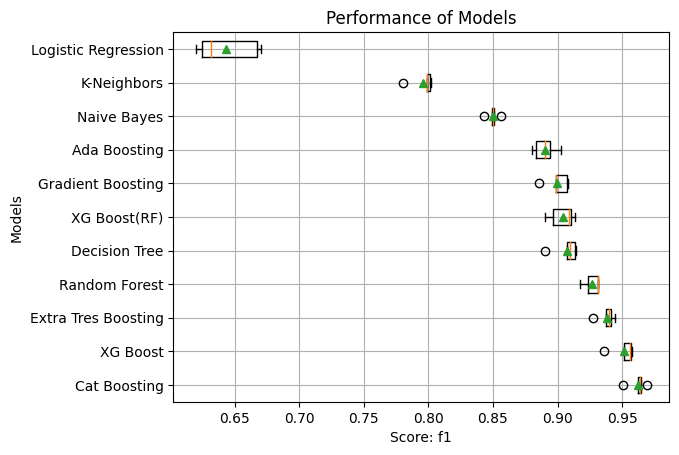

In [113]:
wrapper_bfs_obj.box_plot(bfs_models_report['model_name'].to_list(), bfs_models_report['cv_scores'].to_list())

### Backward Feature Elimination

Possible Algorithms to use (only parametric algorithms):

- Logistic Regression
- Suport Vector Machine
- Decision Tree
- Random Forest
- Gradient Boost
- Ada Boost
- Extra Tree Classifier
- Xtream Gradient Boost
- Xtream Gradient Boost(Random Forest)
- Cat Boost

In [114]:
wrapper_bfe_obj = Wrapper_Methods(
    DATA,
    FEATURES,
    TARGET_COL,
    SCORING,
    CV,
    SEED,
    SHUFFLE
)

### 1. Logistic Regression

In [115]:
LR_model_report = wrapper_bfe_obj.backward_feature_elimination(["LR"], True)
LR_model_report

/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

=============== Logistic Regression ===============
1 : Mean: 0.867298975641746 Std: 0.006864407735388557



{'model_name': ['Logistic Regression'],
 'selected_features': [array(['Age_Power'], dtype=object)],
 'cv_scores': [array([0.88026244, 0.86095662, 0.8651371 , 0.86254869, 0.86759003])]}

### 2. Support Vector Machine

In [116]:
SVM_model_report = wrapper_bfe_obj.backward_feature_elimination(["SVM"], True)
SVM_model_report

/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

=============== Support Vector ===============
1 : Mean: 0.7302400160865148 Std: 0.0006677366767461721



{'model_name': ['Support Vector'],
 'selected_features': [array(['Work_type_children'], dtype=object)],
 'cv_scores': [array([0.7294217 , 0.73104617, 0.72950127, 0.73081814, 0.73041281])]}

### 3. Decision Tree

In [117]:
DT_model_report = wrapper_bfe_obj.backward_feature_elimination(["DT"], True)
DT_model_report

=============== Decision Tree ===============
3 : Mean: 0.9227525039276984 Std: 0.011643585640609501



{'model_name': ['Decision Tree'],
 'selected_features': [array(['Age_Power', 'Avg_glucose_level_Power', 'Bmi_Imputed_median'],
        dtype=object)],
 'cv_scores': [array([0.93735763, 0.93111366, 0.9271137 , 0.91014493, 0.9080326 ])]}

### 4. Random Forest

In [118]:
RF_model_report = wrapper_bfe_obj.backward_feature_elimination(["RF"], True)
RF_model_report

/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return f

=============== Random Forest ===============
2 : Mean: 0.8951416631245923 Std: 0.010816508965720024



{'model_name': ['Random Forest'],
 'selected_features': [array(['Age_Power', 'Bmi_Imputed_median'], dtype=object)],
 'cv_scores': [array([0.91257755, 0.88685714, 0.89737742, 0.88100686, 0.89788933])]}

### 5. Gradient Boost

In [119]:
GB_model_report = wrapper_bfe_obj.backward_feature_elimination(["GB"], True)
GB_model_report

/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_

=============== Gradient Boosting ===============
13 : Mean: 0.9421599960000009 Std: 0.006764688706197687



{'model_name': ['Gradient Boosting'],
 'selected_features': [array(['Age_Power', 'Avg_glucose_level_Power', 'Bmi_Imputed_median',
         'Gender_encode', 'Ever_married_encode', 'Work_type_encode',
         'Work_type_govt_job', 'Work_type_private',
         'Work_type_self_employed', 'Residence_type_encode',
         'Smoking_status_encode', 'Smoking_status_never_smoked',
         'Smoking_status_smokes'], dtype=object)],
 'cv_scores': [array([0.94778214, 0.94784072, 0.93912063, 0.93023256, 0.94582393])]}

### 6. Ada Boost

In [120]:
AB_model_report = wrapper_bfe_obj.backward_feature_elimination(["AB"], True)
AB_model_report

/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

=============== Ada Boosting ===============
9 : Mean: 0.8976071412551123 Std: 0.010292388539326961



{'model_name': ['Ada Boosting'],
 'selected_features': [array(['Age_Power', 'Avg_glucose_level_Power', 'Bmi_Imputed_median',
         'Work_type_encode', 'Work_type_children', 'Work_type_private',
         'Smoking_status_encode', 'Smoking_status_never_smoked',
         'Smoking_status_unknown'], dtype=object)],
 'cv_scores': [array([0.90929327, 0.89700997, 0.89186176, 0.88179272, 0.90807799])]}

### 7. Extra Tree Classifier

In [121]:
ETC_model_report = wrapper_bfe_obj.backward_feature_elimination(["ETC"], True)
ETC_model_report

/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return f

=============== Extra Tres Boosting ===============
2 : Mean: 0.8900546232128006 Std: 0.009724949322313357



{'model_name': ['Extra Tres Boosting'],
 'selected_features': [array(['Age_Power', 'Bmi_Imputed_median'], dtype=object)],
 'cv_scores': [array([0.90495162, 0.88      , 0.89443814, 0.87880528, 0.89207807])]}

### 8. Xtream Gradient Boost

In [122]:
XGB_model_report = wrapper_bfe_obj.backward_feature_elimination(["XGB"], True)
XGB_model_report

=============== XG Boost ===============
8 : Mean: 0.9649007346060401 Std: 0.00470712489726839



{'model_name': ['XG Boost'],
 'selected_features': [array(['Age_Power', 'Avg_glucose_level_Power', 'Gender_encode',
         'Ever_married_encode', 'Work_type_encode', 'Work_type_private',
         'Smoking_status_encode', 'Smoking_status_never_smoked'],
        dtype=object)],
 'cv_scores': [array([0.96603339, 0.97063903, 0.96373057, 0.956621  , 0.96747967])]}

### 9. Xtream Gradient Boost Random Forest

In [123]:
XGRFB_model_report = wrapper_bfe_obj.backward_feature_elimination(["XGRFB"], True)
XGRFB_model_report

=============== XG Boost(RF) ===============
14 : Mean: 0.9108817676683021 Std: 0.009936318239190719



{'model_name': ['XG Boost(RF)'],
 'selected_features': [array(['Age_Power', 'Avg_glucose_level_Power', 'Bmi_Imputed_median',
         'Gender_encode', 'Ever_married_encode', 'Work_type_encode',
         'Work_type_govt_job', 'Work_type_private',
         'Work_type_self_employed', 'Residence_type_encode',
         'Smoking_status_encode', 'Smoking_status_formerly_smoked',
         'Smoking_status_never_smoked', 'Smoking_status_unknown'],
        dtype=object)],
 'cv_scores': [array([0.91555556, 0.91726818, 0.90584958, 0.89394781, 0.92178771])]}

### 10. Cat Boost

- 2 min

In [124]:
CB_model_report = wrapper_bfe_obj.backward_feature_elimination(["CB"], True)
CB_model_report

=============== Cat Boosting ===============
4 : Mean: 0.9535268089349476 Std: 0.005479580104830882



{'model_name': ['Cat Boosting'],
 'selected_features': [array(['Age_Power', 'Avg_glucose_level_Power', 'Bmi_Imputed_median',
         'Smoking_status_encode'], dtype=object)],
 'cv_scores': [array([0.95830954, 0.95529145, 0.959498  , 0.94501718, 0.94951787])]}

### Final Report

In [132]:
bfe_models_report = wrapper_bfe_obj.get_scores(
    pd.concat(
    [   
        pd.DataFrame(LR_model_report),
        pd.DataFrame(NB_model_report),
        # pd.DataFrame(SVM_model_report),
        pd.DataFrame(KNN_model_report),
        pd.DataFrame(DT_model_report),
        pd.DataFrame(RF_model_report),
        pd.DataFrame(GB_model_report),
        pd.DataFrame(AB_model_report),
        pd.DataFrame(ETC_model_report),
        pd.DataFrame(XGB_model_report),
        pd.DataFrame(XGRFB_model_report),
        pd.DataFrame(CB_model_report)
    ],
    axis=0
).reset_index(
    drop=True
)
)

In [133]:
bfe_models_report

,model_name,cv_scores,mean,std
0,XG Boost,"[0.9660333909038572, 0.9706390328151987, 0.963...",0.964901,0.004707
1,Cat Boosting,"[0.9583095374071959, 0.955291454442558, 0.9594...",0.953527,0.005480
2,Gradient Boosting,"[0.9477821448624368, 0.9478407178911946, 0.939...",0.942160,0.006765
3,Decision Tree,"[0.9373576309794989, 0.931113662456946, 0.9271...",0.922753,0.011644
4,XG Boost(RF),"[0.9155555555555555, 0.9172681843420322, 0.905...",0.910882,0.009936
5,Ada Boosting,"[0.9092932665553701, 0.8970099667774086, 0.891...",0.897607,0.010292
6,Random Forest,"[0.9125775521714609, 0.8868571428571429, 0.897...",0.895142,0.010817
7,Extra Tres Boosting,"[0.9049516220830961, 0.88, 0.8944381384790011,...",0.890055,0.009725
8,Logistic Regression,"[0.8802624384909786, 0.8609566184649612, 0.865...",0.867299,0.006864
9,Naive Bayes,"[0.8498753117206982, 0.8432539682539684, 0.855...",0.849800,0.004049


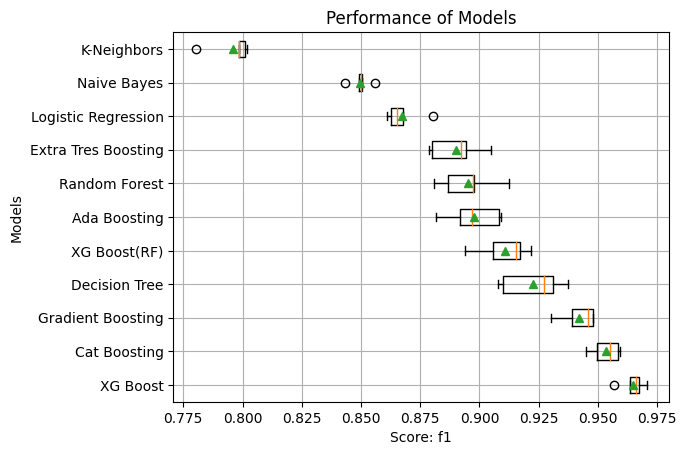

In [134]:
wrapper_bfe_obj.box_plot(bfe_models_report['model_name'].to_list(), bfe_models_report['cv_scores'].to_list())

## 3. Embedded Methods

In [125]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importance(importances, feature_names, title="Feature Importances", top_n=None):
    """
    Plots a bar chart of feature importances.

    Args:
        importances (array-like): Array of importance scores or coefficients.
        feature_names (list): Corresponding feature names.
        title (str): Plot title.
        top_n (int or None): Number of top features to plot. If None, plot all.
    """
    importances = np.array(importances)
    feature_names = np.array(feature_names)

    # Filter top N if needed
    if top_n is not None:
        indices = np.argsort(importances)[-top_n:][::-1]
    else:
        indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), feature_names[indices])
    plt.gca().invert_yaxis()
    plt.xlabel("Importance")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### 3.1 Decision Tree

In [126]:
# Train a Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_res, y_res)

DecisionTreeClassifier()

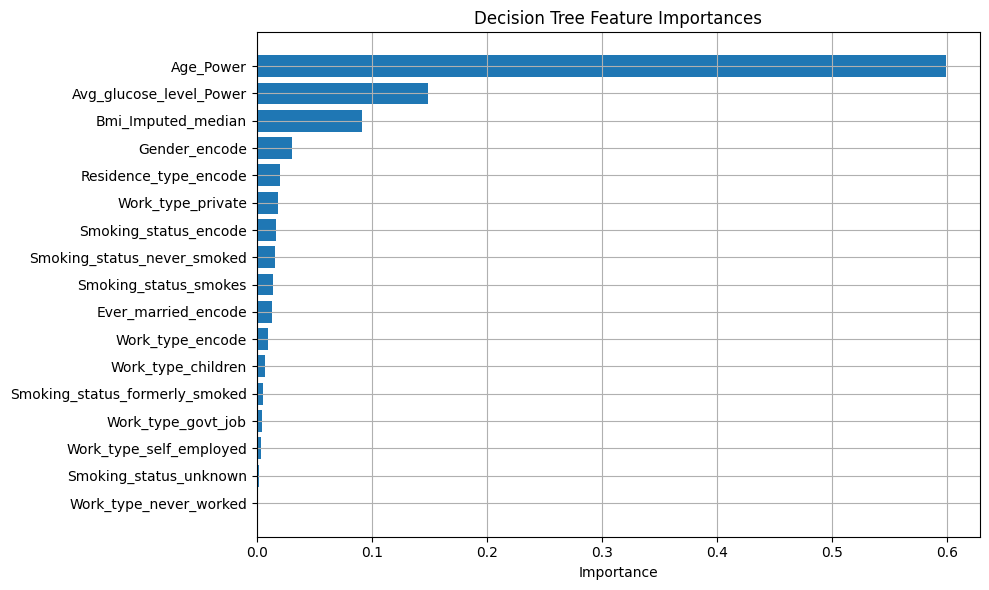

In [128]:
# Plot feature importances
plot_feature_importance(
    importances=dt.feature_importances_,
    feature_names=FEATURES,
    title="Decision Tree Feature Importances"
)

### 3.2 Random Forest

In [129]:
# Train random forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_res, y_res)

RandomForestClassifier()

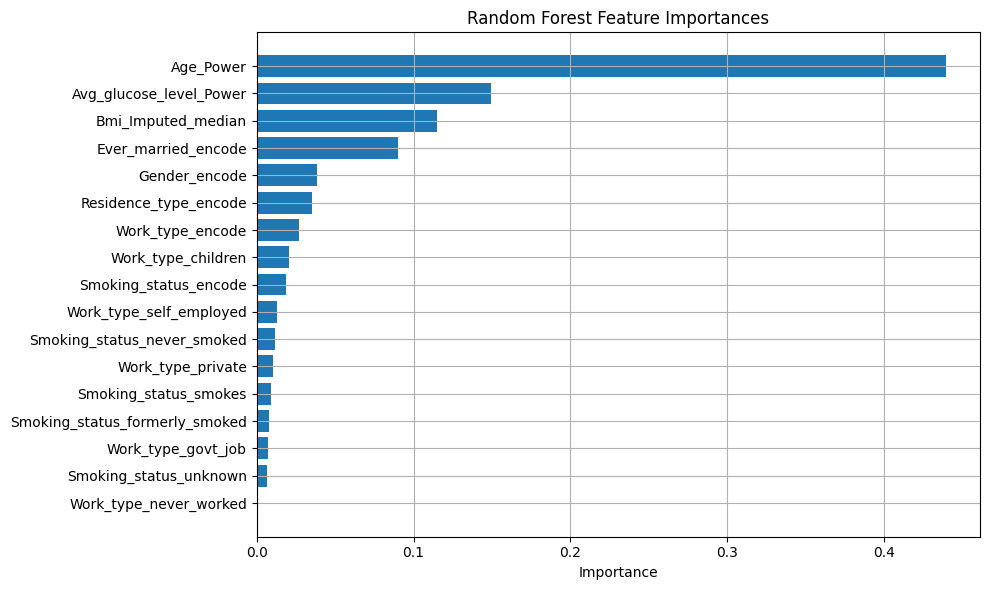

In [131]:
# Plot feature importances
plot_feature_importance(
    importances=rf.feature_importances_,
    feature_names=FEATURES,
    title="Random Forest Feature Importances"
)

**Conclusion:**

Selected Columns:

- `Age_Power`, `Avg_glucose_level_Power`, `Bmi_Imputed_median`, `Ever_married_encode`, `Gender_encode`, 
`Residence_type_encode`, `Work_type_encode`, `Work_type_children`, `Smonking_status_encode`

# Selected Features

In [ ]:
STATISTICALLY_FILTTERED = ['Age_Power', 'Avg_glucose_level_Power', 'Bmi_Imputed_median',
                            'Ever_married_encode', 'Work_type_encode', 'Work_type_children',
                            'Work_type_self_employed', 'Smoking_status_encode', 'Smoking_status_formerly_smoked', 
                            'Smoking_status_unknown']

In [137]:
FORWARDS_FEATURE_SELECTION = ['Age_Power', 'Ever_married_encode', 'Work_type_encode',
         'Work_type_children', 'Work_type_govt_job',
         'Work_type_self_employed', 'Residence_type_encode',
         'Smoking_status_never_smoked']

In [138]:
BACKWARDS_FEATURE_SELECTION = ['Age_Power', 'Avg_glucose_level_Power', 'Gender_encode',
         'Ever_married_encode', 'Work_type_never_worked',
         'Residence_type_encode', 'Smoking_status_formerly_smoked',
         'Smoking_status_never_smoked', 'Smoking_status_smokes']

In [139]:
BACKWARD_FEATURE_ELIMINATION = ['Age_Power', 'Avg_glucose_level_Power', 'Gender_encode',
         'Ever_married_encode', 'Work_type_encode', 'Work_type_private',
         'Smoking_status_encode', 'Smoking_status_never_smoked']

In [136]:
EBEDDED_FEATURES = ['Age_Power', 'Avg_glucose_level_Power', 'Bmi_Imputed_median', 'Ever_married_encode', 'Gender_encode', 
'Residence_type_encode', 'Work_type_encode', 'Work_type_children', 'Smonking_status_encode']